In [1]:
#Importing the required modules and general setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleAdiabatic
from galpy.df import quasiisothermaldf
from galpy.util.bovy_coords import *
import sys
sys.path.append('..')

#Importing qdf load data
inputs_qdf = np.load('../mock_data/qdf/data/sampleV_at_(0.0,0.0,0.0)_epsilon=0.5.npy')

#Setting up action angle and qdf instances
aA = actionAngleAdiabatic(pot=MWPotential2014,c=True)
qdf = quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

#Splitting data into individual parameters
x, y, z, vx, vy, vz = np.hsplit(inputs_qdf, 6)

c:\users\ayush\anaconda3\lib\site-packages\astropy\coordinates\sky_coordinate.py:1786: AstropyDeprecationWarning: Passing a frame as a positional argument is now deprecated, use the frame= keyword argument instead.
  "instead.", AstropyDeprecationWarning)



In [2]:
#Defining a KDE function to quickly compute probabilities for the data set
def generate_KDE(inputs, ker):
    """
    NAME:
        generate_KDE
    
    PURPOSE:
        Given an NxM matrix for inputs and one of six avaliable ker strings, 
        outputs a function `input_DKE` that treats the density estimate as a 
        black box function that can be sampled.
    
    INPUT:
        inputs (ndarray) = An NxM matrix where N is the number of data 
                           points and M is the number of parameters.
        ker (string) = One of the 6 avaliable kernel types (gaussian, 
                       tophat, epanechnikov, exponential, linear, cosine).
    
    OUTPUT:
        input_KDE (function) = A blackbox function for the density estimate
                               used for sampling data.
                               
    HISTORY:
        2018-06-25 - Updated - Ayush Pandhi
    """
    #Scaling velocities with standard deviation
    inputs_std = np.nanstd(inputs, axis=0)
    inputs = inputs/inputs_std
    
    #Optimizing bandwidth in terms of Scott's Rule of Thumb
    shape_string = str(inputs.shape)
    objects, parameters = shape_string.split(', ')
    N_string = objects[1:]
    N = int(N_string)
    IQR = iqr(inputs)
    A = min(np.std(inputs), IQR/1.34)
    bw = 1.059 * A * N ** (-1/5.)
    
    #Fit data points to selected kernel and bandwidth
    kde = KernelDensity(kernel=ker, bandwidth=bw).fit(inputs)  
    
    def input_KDE(samples):
        """
        NAME:
            input_KDE
    
        PURPOSE:
            Given a QxM matrix for samples, evaluates the blackbox density
            estimate function at those points to output a 1xQ array of 
            density values.
    
        INPUT:
            samples (ndarray) = A QxM matrix where Q is the number of points 
                                at which the kde is being evaluated and M is 
                                the number of parameters.
                                
        OUTPUT:
            dens (ndarray) = A 1xQ array of density values for Q data points.
                               
        HISTORY:
            2018-06-25 - Updated - Ayush Pandhi
        """
        #To correct the type of information from other functions into acceptable input
        #samples = np.array([samples])
        
        #Scaling samples with standard deviation
        samples = samples/inputs_std
        
        #Get the log density for selected samples and apply exponential to get normal probabilities
        log_dens = kde.score_samples(samples)
        dens = np.exp(log_dens)
        
        #Return a 1xQ array of normal probabilities for the selected sample
        return dens
    
    #Return a black box function for sampling
    return input_KDE

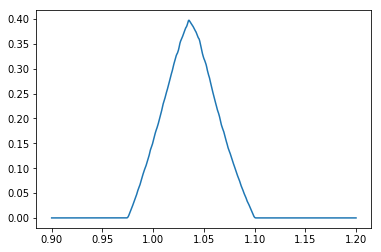

In [3]:
#Generate kde for qdf x inputs
kde_qdfx = generate_KDE(x, 'epanechnikov')

#Plot kde in x dim
x_points = np.linspace(0.9, 1.2, 1000)
x_points = x_points.reshape(-1, 1)
y1 = kde_qdfx(x_points)
plt.plot(x_points, y1)
plt.show()

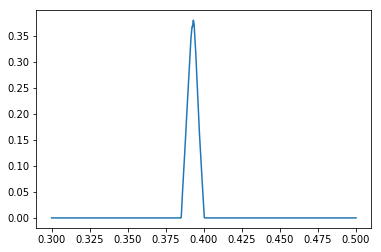

In [4]:
#Generate kde for qdf y inputs
kde_qdfy = generate_KDE(y, 'epanechnikov')

#Plot kde in y dim
y_points = np.linspace(0.3, 0.5, 1000)
y_points = y_points.reshape(-1, 1)
y2 = kde_qdfy(y_points)
plt.plot(y_points, y2)
plt.show()

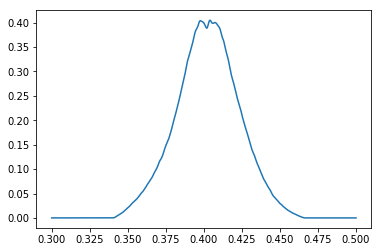

In [5]:
#Generate kde for qdf z inputs
kde_qdfz = generate_KDE(z, 'epanechnikov')

#Plot kde in z dim
z_points = np.linspace(-0.1, 0.1, 1000)
z_points = z_points.reshape(-1, 1)
y3 = kde_qdfz(z_points)
plt.plot(y_points, y3)
plt.show()

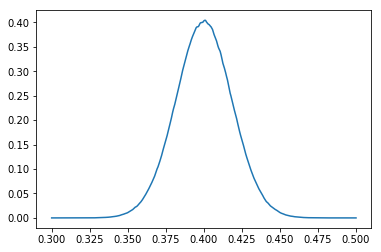

In [6]:
#Generate kde for qdf vx inputs
kde_qdfvx = generate_KDE(vx, 'epanechnikov')

#Plot kde in vx dim
vx_points = np.linspace(-240, 240, 1000)
vx_points = vx_points.reshape(-1, 1)
y4 = kde_qdfvx(vx_points)
plt.plot(y_points, y4)
plt.show()

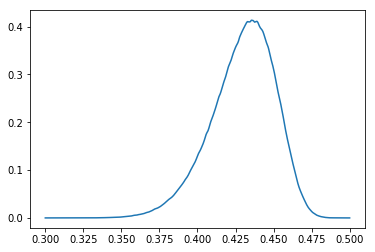

In [7]:
#Generate kde for qdf vy inputs
kde_qdfvy = generate_KDE(vy, 'epanechnikov')

#Plot kde in vx dim
vy_points = np.linspace(0, 310, 1000)
vy_points = vy_points.reshape(-1, 1)
y5 = kde_qdfvy(vy_points)
plt.plot(y_points, y5)
plt.show()

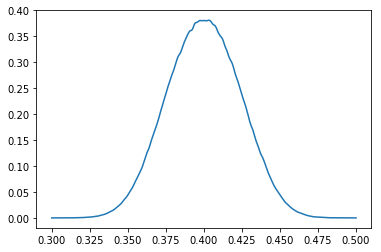

In [8]:
#Generate kde for qdf vz inputs
kde_qdfvz = generate_KDE(vz, 'epanechnikov')

#Plot kde in vx dim
vz_points = np.linspace(-80, 80, 1000)
vz_points = vz_points.reshape(-1, 1)
y6 = kde_qdfvz(vz_points)
plt.plot(y_points, y6)
plt.show()

In [9]:
print(np.min(x), np.mean(x), np.max(x))

0.9751139997235092 1.0364926237204164 1.099952534668818


In [10]:
print(np.min(y), np.mean(y), np.max(y))

0.38516836729921194 0.3926625378618215 0.40022940752140157


In [11]:
print(np.min(z), np.mean(z), np.max(z))

-0.059030124036155804 0.0025692702589305196 0.0656483040401513


In [12]:
print(np.min(vx), np.mean(vx), np.max(vx))

-226.5417324492553 0.007393815901565885 236.4970525786968


In [13]:
print(np.min(vy), np.mean(vy), np.max(vy))

18.03771310630135 200.92571250021766 300.6440011512034


In [14]:
print(np.min(vz), np.mean(vz), np.max(vz))

-78.63184750506196 -0.001518106057358567 79.49529776718326
